In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from time import time

%matplotlib inline

# Define function to look up similar items 

In [56]:
def similar_items(track_uri):
    D_rec={}
    time0 = time()
    idx = D_track_uri_to_id[track_uri]
    similarity_array = cosine_similarity(X_transformed[idx:idx+1,:], X_transformed)
    recc_tracks = np.fliplr(similarity_array.argsort())
    for el in recc_tracks[0][1:501]:
        D_rec[D_track_id_to_uri[el]]=similarity_array[0][el]
    print(f'{time()-time0:0.2f}sec')
    return D_rec

In [57]:
def similar_items_with_description(track_uri, top_n):
    D_rec={}
    time0 = time()
    idx = D_track_uri_to_id[track_uri]
    similarity_array = cosine_similarity(X_transformed[idx:idx+1,:], X_transformed)
    recc_tracks = np.fliplr(similarity_array.argsort())
    for el in recc_tracks[0][0:top_n]:
        D_rec[D_track_id_to_uri[el]]=D_desc[D_track_id_to_uri[el]]
    print(f'{time()-time0:0.2f}sec')
    return D_rec

# Load data

In [2]:
with open('../data-processed/full-data/track_descriptions.json') as json_file:
    D_desc = json.load(json_file)
    
D_desc['spotify:track:0UaMYEvWZi0ZqiDOoHU3YI']

['Lose Control (feat. Ciara & Fat Man Scoop)', 'Missy Elliott', 'The Cookbook']

In [27]:
with open('../data-processed/full-data/track_artist_album.json') as json_file:
    D_album_artist = json.load(json_file)
    
D_album_artist['spotify:track:0UaMYEvWZi0ZqiDOoHU3YI']

['spotify:artist:2wIVse2owClT7go1WT98tk',
 'spotify:album:6vV5UrXcfyQD1wu4Qo2I9K']

In [3]:
path = '../data-processed/full-data/audio-features-combined.csv'
data = pd.read_csv(path)

In [5]:
data = data.reset_index()
data = data.rename(columns = {'index':'track_id'})
data['artist_uri'] = data.apply(lambda x:D_album_artist[x.uri][0], axis =1)
data['album_uri'] = data.apply(lambda x:D_album_artist[x.uri][1], axis =1)

In [35]:
data.head()

,track_id,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_uri,album_uri
0,0,spotify:track:5OSaZxhNj307YpTh7Qp8Xy,0.716,0.421,7,-11.560,0,0.0275,0.649000,0.002070,0.0936,0.2070,99.078,378440,4,spotify:artist:1vSHzGHsVOCrgPSCmKNimP,spotify:album:0oA1WetYmmrxkyjxz92yJg
1,1,spotify:track:4zytmsfZ7HtdXj3VLECcu2,0.141,0.441,5,-12.893,1,0.0892,0.700000,0.687000,0.1280,0.0725,76.044,331000,4,spotify:artist:6gHYtzSvIIWvoUY2q2V3Rj,spotify:album:3c1gpGKfahKOFXtM7eIcFO
2,2,spotify:track:6lOWUS7iBVEw6ieJqxH17B,0.799,0.893,8,-5.496,1,0.0635,0.000018,0.914000,0.3620,0.5290,128.009,469397,4,spotify:artist:7kxOVclB0zQamtBR0syCrg,spotify:album:0mX83KZvGWqBOvI4nIZ23H
3,3,spotify:track:3OSL6hJ9DoRGwr9OSEVrRS,0.789,0.548,4,-7.167,1,0.0418,0.707000,0.000934,0.0616,0.5930,117.713,153893,4,spotify:artist:2sxmKe3CUrWnx7eoXMhOlW,spotify:album:4hXCM8vqLJnlFcuHoH3zVP
4,4,spotify:track:6x0bgGOKckFsesVf7yPWJq,0.728,0.670,3,-7.912,0,0.1020,0.157000,0.000797,0.1080,0.0647,119.963,196000,4,spotify:artist:6PyeXqjH8OMGnt1IOhWgrQ,spotify:album:1pjNAADvPDurRS42fqxN4k


In [9]:
D_track_uri_to_id = data.groupby('uri')['track_id'].min().to_dict()
D_track_id_to_uri = data.groupby('track_id')['uri'].min().to_dict()

In [10]:
len(D_track_uri_to_id), len(D_track_id_to_uri)

(2262190, 2262190)

# Plot data

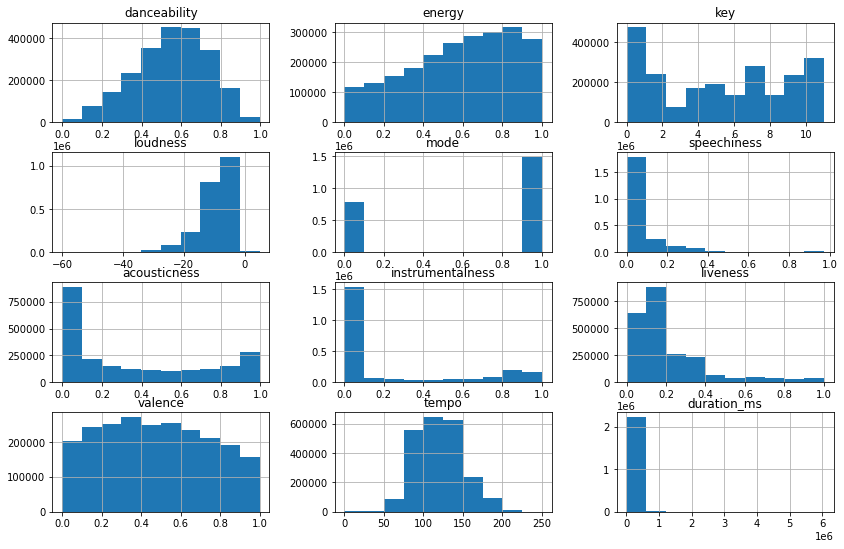

In [12]:
data.iloc[:,1:-1].hist(figsize=(14,9))
plt.show()

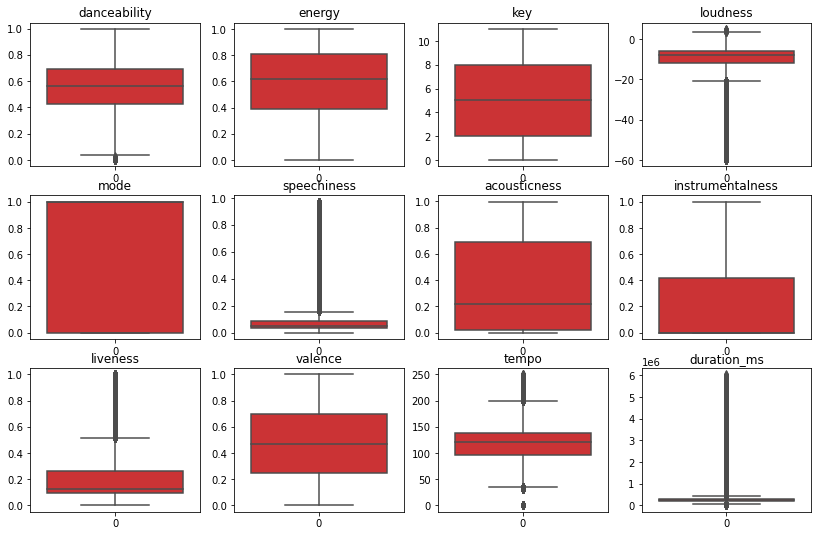

In [13]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(14,9))

column = data.columns[2:14]

for i in range(3):
    for j in range(4):
        sns.boxplot(data=data[column[i*4+j]], palette="Set1", ax=ax[i,j]).set_title(column[i*4+j])

# Standardize data 

In [14]:
X = data.iloc[:,2:13]

In [15]:
#column orders
data.iloc[:,2:13].columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [16]:
scaler = StandardScaler()
transformer = scaler.fit(X)
X_transformed = transformer.transform(X)

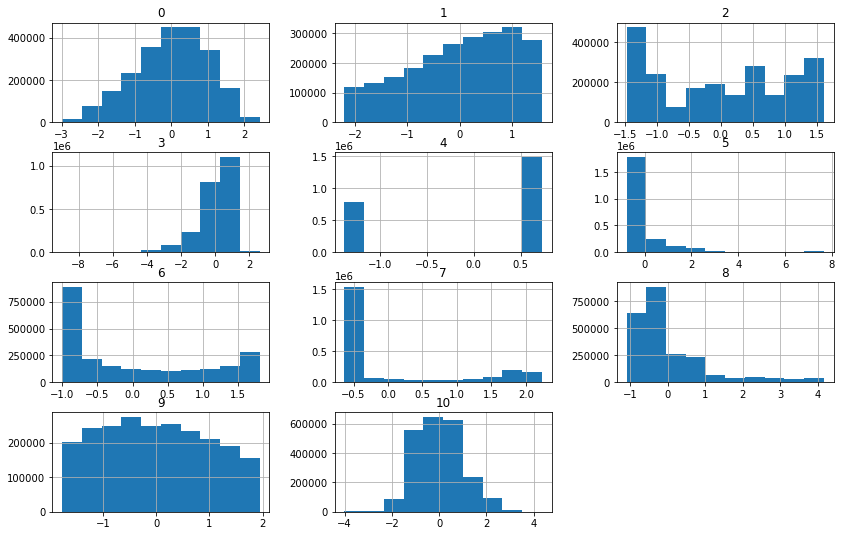

In [17]:
pd.DataFrame(X_transformed).hist(figsize=(14,9))
plt.show()

# Perform PCA

In [ ]:
X_transformed.shape

In [ ]:
pca = PCA(n_components='mle')
pca = pca.fit(X_transformed)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
X_transformed_pca = pca.transform(X_transformed)

In [ ]:
pca.transform(arr.reshape(1, -1))

> PCA does not result in a major dimensionality reduction, so we will proceed with original dimensions, and the `X_transformed` as input for the next steps

# Similarity matrix

In [18]:
X_transformed[1:2,:]

array([[-2.21872883e+00, -5.40820327e-01, -7.34209218e-02,
        -5.74499848e-01,  7.25818014e-01, -2.77482295e-04,
         9.74098644e-01,  1.33416011e+00, -4.27319752e-01,
        -1.49346481e+00, -1.46858811e+00]])

In [61]:
list(similar_items_with_description('spotify:track:2pJZ1v8HezrAoZ0Fhzby92',20).values())

0.51sec


[['What Do I Know?', 'Ed Sheeran', '÷'],
 ['Marvin Gaye', 'Straight No Chaser', 'The New Old Fashioned'],
 ['Kontrol - Extended', 'Maleek Berry', 'Last Daze Of Summer'],
 ['Clover', "The King's Parade", 'Clover'],
 ['Your the One for Me (feat. Shaggamon)',
  'Pohaku "Friends Forever"',
  'The R.B.M. Collection 2013'],
 ['Close To You Feat. RIVRS - Original Mix', 'Lobo', 'Poolside Mexico'],
 ['Well But Strangely Hung Man', 'Sonny & The Sunsets', 'Moods Baby Moods'],
 ['Llora Corazón', 'Charlie Zaa', 'Bachateando 2'],
 ['Te Burlaste De Mi', 'El Chaval', 'Ya Me Canse'],
 ['Ni Parientes Somos', 'Los Tigres Del Norte', 'Mi Buena Suerte'],
 ['Que Día Es Hoy', 'Yeison Jimenez', 'Con el Corazón'],
 ['Ruby Blue', 'Róisín Murphy', 'Ruby Blue'],
 ["You're Too Pretty",
  'Di Johnston',
  'The Shanghai Restoration Project Presents : Di Johnston'],
 ['Strength To Survive', 'SOJA', 'Strength To Survive'],
 ['Future Love (We All Make Mistakes)', 'The Palms', 'Sway'],
 ['Tu Tu Ratan', 'Orchestra Harlow

In [ ]:
D_rec

In [48]:
D_desc['spotify:track:3ZOEytgrvLwQaqXreDs2Jx']

["Can't Stop", 'Red Hot Chili Peppers', 'By The Way']

In [39]:
print(D_desc['spotify:track:00PhRxMpNWMaIgGLrYeSEB'])
print(D_desc['spotify:track:3QsLbvkGSTJCTZuuQTlOTM'])
print(D_desc['spotify:track:7wAkCtju6IAHs5UB9hKOB7'])
print(D_desc['spotify:track:3IeCYkdKI55mNMl2o4vX0k'])
print(D_desc['spotify:track:1Wf3CJgTsabbJeqfJ8TTTJ'])

['Zumba He Zumba Ha (feat. Soldat Jahman & Luis Guisao)', "Dj Mam's", 'Fiesta Buena']
['Believe (feat. Jocelyn Brown) - Ministers Vocal Mix', 'Ministers de la Funk', 'Vintage Ibiza Classics']
['Lose Control', 'Still a Light above', 'Castor']
['Bust A Move', 'Young MC', "Stone Cold Rhymin'"]
['Mansa Musa', 'ICEKIID', 'Mansa Musa']
